In [1]:
# Import modules
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import sklearn as skl
import tensorflow as tf

In [2]:
!pip install keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 2.1 MB/s eta 0:00:00


In [3]:
# Read the CSV file into a Pandas DataFrame
df = pd.read_csv('full_data.csv')

# Review the DataFrame
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [4]:
#Find missing values (NaN or None) in the DataFrame
missing_values = df.isna()

# Display the DataFrame with missing value indicators
print(missing_values)

      gender    age  hypertension  heart_disease  ever_married  work_type  \
0      False  False         False          False         False      False   
1      False  False         False          False         False      False   
2      False  False         False          False         False      False   
3      False  False         False          False         False      False   
4      False  False         False          False         False      False   
...      ...    ...           ...            ...           ...        ...   
4976   False  False         False          False         False      False   
4977   False  False         False          False         False      False   
4978   False  False         False          False         False      False   
4979   False  False         False          False         False      False   
4980   False  False         False          False         False      False   

      Residence_type  avg_glucose_level    bmi  smoking_status  stroke  
0 

In [5]:
# Drop rows containing missing values (axis=0)
data_cleaned = df.dropna(axis=0)

data_cleaned

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0
4977,Male,40.0,0,0,Yes,Private,Urban,191.15,31.1,smokes,0
4978,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4979,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0


In [6]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on your data
scaler.fit(df[['age', 'avg_glucose_level', 'bmi']])

# Transform the numeric columns to scale the data
scaled_data = scaler.transform(df[['age', 'avg_glucose_level', 'bmi']])

# Replace the original numeric columns with scaled values
df[['age', 'avg_glucose_level', 'bmi']] = scaled_data

print(df)


      gender       age  hypertension  heart_disease ever_married  \
0       Male  1.040584             0              1          Yes   
1       Male  1.614270             0              1          Yes   
2     Female  0.246250             0              0          Yes   
3     Female  1.570141             1              0          Yes   
4       Male  1.658400             0              0          Yes   
...      ...       ...           ...            ...          ...   
4976    Male -0.106788             0              0           No   
4977    Male -0.150917             0              0          Yes   
4978  Female  0.069731             1              0          Yes   
4979    Male -0.150917             0              0          Yes   
4980  Female  1.614270             1              0          Yes   

          work_type Residence_type  avg_glucose_level       bmi  \
0           Private          Urban           2.723411  1.193238   
1           Private          Rural          -0.00

In [7]:
# Use get_dummies to one-hot encode categorical columns
encoded_data = pd.get_dummies(df, columns=['gender','ever_married', 'work_type', 'Residence_type', 'smoking_status'])

encoded_data.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1.040584,0,1,2.723411,1.193238,1,0,1,0,1,0,1,0,0,0,1,0,1,0,0
1,1.614270,0,1,-0.000523,0.589390,1,0,1,0,1,0,1,0,0,1,0,0,0,1,0
2,0.246250,0,0,1.448529,0.869222,1,1,0,0,1,0,1,0,0,0,1,0,0,0,1
3,1.570141,1,0,1.512650,-0.662492,1,1,0,0,1,0,0,1,0,1,0,0,0,1,0
4,1.658400,0,0,1.780895,0.073909,1,0,1,0,1,0,1,0,0,0,1,0,1,0,0


In [8]:
#split off target variable and preserve clean data
target_df = encoded_data['stroke']
final_df = encoded_data.drop('stroke', axis=1)
final_df.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1.040584,0,1,2.723411,1.193238,0,1,0,1,0,1,0,0,0,1,0,1,0,0
1,1.614270,0,1,-0.000523,0.589390,0,1,0,1,0,1,0,0,1,0,0,0,1,0
2,0.246250,0,0,1.448529,0.869222,1,0,0,1,0,1,0,0,0,1,0,0,0,1
3,1.570141,1,0,1.512650,-0.662492,1,0,0,1,0,0,1,0,1,0,0,0,1,0
4,1.658400,0,0,1.780895,0.073909,0,1,0,1,0,1,0,0,0,1,0,1,0,0


In [9]:
#check d_types - look into uint8
final_df.dtypes

age                               float64
hypertension                        int64
heart_disease                       int64
avg_glucose_level                 float64
bmi                               float64
gender_Female                       uint8
gender_Male                         uint8
ever_married_No                     uint8
ever_married_Yes                    uint8
work_type_Govt_job                  uint8
work_type_Private                   uint8
work_type_Self-employed             uint8
work_type_children                  uint8
Residence_type_Rural                uint8
Residence_type_Urban                uint8
smoking_status_Unknown              uint8
smoking_status_formerly smoked      uint8
smoking_status_never smoked         uint8
smoking_status_smokes               uint8
dtype: object

In [10]:
#random under sample majority (non-stroke) + oversample minority (stroke) groups for bias tuning
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
#init sampler
rus = RandomUnderSampler(sampling_strategy='majority', random_state=0)
ros = RandomOverSampler(sampling_strategy=0.1,random_state=0)

In [11]:
#fit and undersample majority (non-stroke) category - default is only undersampling - to use both over + under sampling comment out cell and use next cell
#resampled_final, resampled_target = rus.fit_resample(final_df, target_df)

In [12]:
                                                          # use this cell for both over + under sampling
#random oversample minority category
ros_final, ros_target = ros.fit_resample(final_df, target_df)
#random under sample majority category
resampled_final, resampled_target = rus.fit_resample(ros_final, ros_target)

In [13]:
resampled_target.value_counts()

0    473
1    473
Name: stroke, dtype: int64

In [14]:
#split data into train test
X_train, X_test, y_train, y_test = train_test_split(resampled_final, resampled_target, random_state=10, stratify=resampled_target)
X_train.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
445,-0.371566,0,0,-0.757331,-0.456299,1,0,1,0,0,1,0,0,0,1,1,0,0,0
287,1.658400,0,0,-0.288070,-0.927596,0,1,0,1,0,1,0,0,1,0,0,0,1,0
852,1.040584,0,1,2.723411,1.193238,0,1,0,1,0,1,0,0,0,1,0,1,0,0
104,0.422769,0,0,-0.436947,0.118093,0,1,0,1,0,1,0,0,0,1,0,0,1,0
372,1.217103,0,0,-0.241033,0.442109,0,1,1,0,0,1,0,0,0,1,0,0,1,0


# Random Forest Classifier

In [15]:
#import RandomForestClassifer + metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [16]:
#init rf model and fit to training data
rf_model = RandomForestClassifier(n_estimators=3000, random_state=42) #model max acc at n_estimators = 4000, acc loss beginning at 8000
rf_model = rf_model.fit(X_train, y_train)

In [17]:
# Calculating the confusion matrix
predictions = rf_model.predict(X_test)
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [18]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,82,36
Actual 1,17,102


Accuracy Score : 0.7763713080168776
Classification Report
              precision    recall  f1-score   support

           0       0.83      0.69      0.76       118
           1       0.74      0.86      0.79       119

    accuracy                           0.78       237
   macro avg       0.78      0.78      0.77       237
weighted avg       0.78      0.78      0.77       237



In [19]:
#get feature importance dict
importances = rf_model.feature_importances_
sorted(zip(rf_model.feature_importances_, resampled_final.columns), reverse=True)

[(0.33633311351407025, 'age'),
 (0.201827887503855, 'avg_glucose_level'),
 (0.16705082411944155, 'bmi'),
 (0.03338609833904722, 'hypertension'),
 (0.024292601535045314, 'ever_married_Yes'),
 (0.02420984285165023, 'ever_married_No'),
 (0.023540122817368798, 'heart_disease'),
 (0.020793183378631168, 'work_type_Private'),
 (0.01961304788088818, 'work_type_Self-employed'),
 (0.01740044840448223, 'smoking_status_never smoked'),
 (0.017230886976674183, 'gender_Male'),
 (0.017190694566033598, 'gender_Female'),
 (0.01686581773160863, 'smoking_status_formerly smoked'),
 (0.01649101584354834, 'Residence_type_Urban'),
 (0.016016655025569617, 'Residence_type_Rural'),
 (0.014053561309664609, 'work_type_Govt_job'),
 (0.013181350780409438, 'smoking_status_Unknown'),
 (0.012989272911274158, 'smoking_status_smokes'),
 (0.0075335745107375195, 'work_type_children')]

<Axes: title={'center': 'Features Importances'}, ylabel='1'>

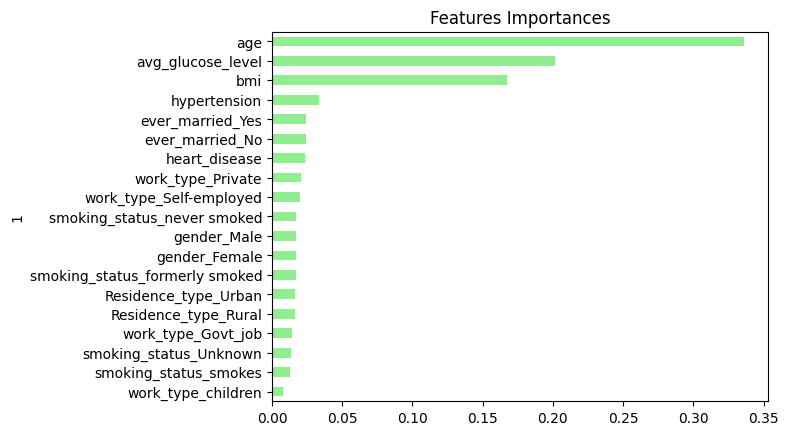

In [20]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, resampled_final.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)

# K Nearest Neighbor


In [21]:
# Import the KNeighborsClassifier module from sklearn
from sklearn.neighbors import KNeighborsClassifier
# Instantiate the KNeighborsClassifier model with n_neighbors = 3
knn = KNeighborsClassifier(n_neighbors=2)

In [22]:
# Train the model using the training data
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=2)

In [23]:
# Create predictions using the testing data
y_pred = knn.predict(X_test)
y_pred

array([1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0])

In [24]:
# Print the classification report comparing the testing data to the model predictions
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.77      0.73       118
           1       0.75      0.66      0.70       119

    accuracy                           0.72       237
   macro avg       0.72      0.72      0.72       237
weighted avg       0.72      0.72      0.72       237



In [25]:
best_accuracy = 0
best_n_neighbors = 0

# Try different values of n_neighbors from 1 to 20
for n in range(1, 200):
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_n_neighbors = n

print(f"Best n_neighbors: {best_n_neighbors}")
print(f"Best accuracy: {best_accuracy}")

Best n_neighbors: 1
Best accuracy: 0.7679324894514767


In [26]:

from sklearn.metrics import accuracy_score
# with best n_neighbors value from tuning
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(classification_report(y_test, y_pred))
print(f'The accuracy is {accuracy * 100:.2f}%')


              precision    recall  f1-score   support

           0       0.81      0.70      0.75       118
           1       0.74      0.83      0.78       119

    accuracy                           0.77       237
   macro avg       0.77      0.77      0.77       237
weighted avg       0.77      0.77      0.77       237

The accuracy is 76.79%


# Neural Network


In [27]:
## neural network auto params and neural network
# Create a method that creates a new Sequential model with hyperparameter options
def create_model(hp):
    nn_model = tf.keras.models.Sequential()

    # Allow kerastuner to decide which activation function to use in hidden layers
    activation = hp.Choice('activation',['relu','tanh','sigmoid'])

    # Allow kerastuner to decide number of neurons in first layer
    nn_model.add(tf.keras.layers.Dense(units=hp.Int('first_units',
        min_value=1,
        max_value=10,
        step=2), activation=activation, input_dim=19))

    # Allow kerastuner to decide number of hidden layers and neurons in hidden layers
    for i in range(hp.Int('num_layers', 1, 8)):
        nn_model.add(tf.keras.layers.Dense(units=hp.Int('units_' + str(i),
            min_value=1,
            max_value=10,
            step=2),
            activation=activation))

    nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

    # Compile the model
    nn_model.compile(loss="binary_crossentropy", optimizer='nadam', metrics=["accuracy"])

    return nn_model

In [28]:
# Import the kerastuner library
import keras_tuner as kt

tuner = kt.Hyperband(
    create_model,
    objective="val_accuracy",
    max_epochs=40,
    hyperband_iterations=2)

In [29]:
# Run the kerastuner search for best hyperparameters
tuner.search(X_train,y_train,epochs=20,validation_data=(X_test,y_test))

Trial 180 Complete [00h 00m 10s]
val_accuracy: 0.502109706401825

Best val_accuracy So Far: 0.7763713002204895
Total elapsed time: 00h 15m 10s


In [30]:
best_hyper = tuner.get_best_hyperparameters(1)[0]
best_hyper.values

{'activation': 'tanh',
 'first_units': 9,
 'num_layers': 8,
 'units_0': 3,
 'units_1': 1,
 'units_2': 7,
 'units_3': 9,
 'units_4': 5,
 'units_5': 9,
 'units_6': 5,
 'units_7': 7,
 'tuner/epochs': 40,
 'tuner/initial_epoch': 14,
 'tuner/bracket': 3,
 'tuner/round': 3,
 'tuner/trial_id': '0137'}

In [31]:
# Define the model - deep neural net
number_input_features = 19
hidden_nodes_layer1 =  9
hidden_nodes_layer2 = 3
hidden_nodes_layer3 = 1
hidden_nodes_layer4 = 1
hidden_nodes_layer5 = 3
hidden_nodes_layer6 = 7

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="tanh")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="tanh"))

#third layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="tanh"))

#4th layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer4, activation="tanh"))

#5th layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer5, activation="tanh"))

#6th layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer6, activation="tanh"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 9)                 180       
                                                                 
 dense_11 (Dense)            (None, 3)                 30        
                                                                 
 dense_12 (Dense)            (None, 1)                 4         
                                                                 
 dense_13 (Dense)            (None, 1)                 2         
                                                                 
 dense_14 (Dense)            (None, 3)                 6         
                                                                 
 dense_15 (Dense)            (None, 7)                 28        
                                                                 
 dense_16 (Dense)            (None, 1)                

In [32]:
nn.compile(loss="binary_crossentropy", optimizer="nadam", metrics=["accuracy"])

fit_model = nn.fit(X_train, y_train, epochs=40)

Epoch 1/40
23/23 [==============================] - 2s 3ms/step - loss: 0.7112 - accuracy: 0.4302
Epoch 2/40
23/23 [==============================] - 0s 3ms/step - loss: 0.6971 - accuracy: 0.4908
Epoch 3/40
23/23 [==============================] - 0s 2ms/step - loss: 0.6939 - accuracy: 0.5035
Epoch 4/40
23/23 [==============================] - 0s 3ms/step - loss: 0.6939 - accuracy: 0.4697
Epoch 5/40
23/23 [==============================] - 0s 2ms/step - loss: 0.6933 - accuracy: 0.4993
Epoch 6/40
23/23 [==============================] - 0s 3ms/step - loss: 0.6933 - accuracy: 0.4824
Epoch 7/40
23/23 [==============================] - 0s 3ms/step - loss: 0.6930 - accuracy: 0.4993
Epoch 8/40
23/23 [==============================] - 0s 3ms/step - loss: 0.6929 - accuracy: 0.4993
Epoch 9/40
23/23 [==============================] - 0s 2ms/step - loss: 0.6916 - accuracy: 0.5642
Epoch 10/40
23/23 [==============================] - 0s 2ms/step - loss: 0.6835 - accuracy: 0.6446
Epoch 11/40
23/23 [

In [33]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8/8 - 0s - loss: 0.5696 - accuracy: 0.7553 - 174ms/epoch - 22ms/step
Loss: 0.5695924758911133, Accuracy: 0.75527423620224


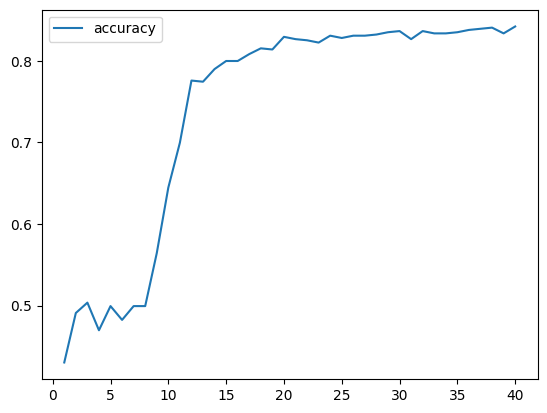

In [34]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history)

# Increase the index by 1 to match the number of epochs
history_df.index += 1
history_df.plot(y="accuracy")
plt.show()